Import Libaries

In [144]:
import pandas as pd
import numpy as np 

Decide which movie should be investigated and plotted. Set star wars four (swiv) to true if yozu want to analyze this movie. If you want to analyze the seventh movie (swvii), you have to set swiv to false.

In [145]:
swiv = True


In [146]:
if swiv == True:
    data = pd.read_csv("swiv.csv")
else:
    data = pd.read_csv("swvii.csv")

In [147]:
data.head()


,name,phrase,numberOfWords
0,C3PO,Did you hear that They've shut down the main r...,18
1,C3PO,We're doomed,2
2,C3PO,There'll be no escape for the Princess this time,9
3,C3PO,What's that,2
4,C3PO,I should have known better than to trust the l...,16


How many times does an actor say something?

In [148]:
actor_names = data['name'].value_counts()
top_actor_names = actor_names.head(13)
print(top_actor_names)


LUKE           252
HAN            151
C3PO           119
BEN             75
LEIA            57
VADER           42
RED LEADER      34
BIGGS           34
TARKIN          28
OWEN            25
TROOPER         19
GOLD LEADER     14
WEDGE           14
Name: name, dtype: int64


In [149]:
if swiv == True:
    top_actor_names = top_actor_names.drop(['RED LEADER','TROOPER','GOLD LEADER'], axis=0)

In [150]:
actorDF = pd.DataFrame()
indexList=[]

actorDF['actor'] = top_actor_names.index
for i in range(len(top_actor_names)):
    indexList.append(top_actor_names.iloc[i])
    
indexDF = pd.DataFrame(indexList)  
actorDF['timesSpoken'] = indexDF

In [151]:
actorDF

,actor,timesSpoken
0,LUKE,252
1,HAN,151
2,C3PO,119
3,BEN,75
4,LEIA,57
5,VADER,42
6,BIGGS,34
7,TARKIN,28
8,OWEN,25
9,WEDGE,14


In [152]:
#access name via index 
print(top_actor_names.index[0])
# access number of mentioned name via iloc
print(top_actor_names.iloc[0])

LUKE
252


Add gender column

In [153]:
gender = []
gender.append('male')
gender.append('female')
gender.append('male')
gender.append('male')
gender.append('male')
gender.append('female')
gender.append('male')
gender.append('male')
gender.append('male')
gender.append('none')
genderDF = pd.DataFrame(gender)
actorDF['gender'] = genderDF

In [154]:
print(actorDF)

    actor  timesSpoken  gender
0    LUKE          252    male
1     HAN          151  female
2    C3PO          119    male
3     BEN           75    male
4    LEIA           57    male
5   VADER           42  female
6   BIGGS           34    male
7  TARKIN           28    male
8    OWEN           25    male
9   WEDGE           14    none


How many words does each of the top actors say?

In [155]:
top_actors_count = len(top_actor_names)
numberList = [] 

for i in range(len(top_actor_names)):
    indexActor = top_actor_names.index[i]
    nameActor = data[data['name']==indexActor]
    numberList.append(nameActor['numberOfWords'].sum())
    
    
numberDF = pd.DataFrame(numberList)
actorDF['numberOfWords'] = numberDF

In [156]:
actorDF

,actor,timesSpoken,gender,numberOfWords
0,LUKE,252,male,2480
1,HAN,151,female,1728
2,C3PO,119,male,1498
3,BEN,75,male,995
4,LEIA,57,male,634
5,VADER,42,female,492
6,BIGGS,34,male,520
7,TARKIN,28,male,409
8,OWEN,25,male,310
9,WEDGE,14,none,82


Bubble charts

In [157]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(actorDF, x="numberOfWords", y="timesSpoken", color="gender", hover_name="actor", log_x=True, size_max=60, width=1000, 
title="Scatterplot of times spoken and number of words for each character. <br>To see which character has spoken how many times and how many words, hover above each point.")
fig.show()


In [158]:
male = actorDF[actorDF['gender']=="male"]
print(male)
male['numberOfWords'].sum()
numberOfWordsMale = male['numberOfWords'].sum()

female = actorDF[actorDF['gender']=="female"]
print(female)
female['numberOfWords'].sum()
numberOfWordsFemale = female['numberOfWords'].sum()

none = actorDF[actorDF['gender']=="none"]
print(none)
none['numberOfWords'].sum()
numberOfWordsNone = none['numberOfWords'].sum()

    actor  timesSpoken gender  numberOfWords
0    LUKE          252   male           2480
2    C3PO          119   male           1498
3     BEN           75   male            995
4    LEIA           57   male            634
6   BIGGS           34   male            520
7  TARKIN           28   male            409
8    OWEN           25   male            310
   actor  timesSpoken  gender  numberOfWords
1    HAN          151  female           1728
5  VADER           42  female            492
   actor  timesSpoken gender  numberOfWords
9  WEDGE           14   none             82


[6846, 2220, 82]


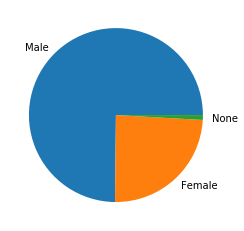

In [159]:
import matplotlib.pyplot as plt


genderData = [numberOfWordsMale, numberOfWordsFemale, numberOfWordsNone]
print(genderData)
genderLabel = ['Male', 'Female', 'None']

plt.pie(genderData, labels=genderLabel)

if (swiv == True):
    plt.savefig('numberOfWordsGender_swiv.png')
else:
    plt.savefig('numberOfWordsGender_swvii.png')

plt.show()

In [160]:
male = actorDF[actorDF['gender']=="male"]
print(male)
male['timesSpoken'].sum()
timesSpokenMale = male['timesSpoken'].sum()

female = actorDF[actorDF['gender']=="female"]
print(female)
female['timesSpoken'].sum()
timesSpokenFemale = female['timesSpoken'].sum()

none = actorDF[actorDF['gender']=="none"]
print(none)
none['timesSpoken'].sum()
timesSpokenNone = none['timesSpoken'].sum()

    actor  timesSpoken gender  numberOfWords
0    LUKE          252   male           2480
2    C3PO          119   male           1498
3     BEN           75   male            995
4    LEIA           57   male            634
6   BIGGS           34   male            520
7  TARKIN           28   male            409
8    OWEN           25   male            310
   actor  timesSpoken  gender  numberOfWords
1    HAN          151  female           1728
5  VADER           42  female            492
   actor  timesSpoken gender  numberOfWords
9  WEDGE           14   none             82


[590, 193, 14]


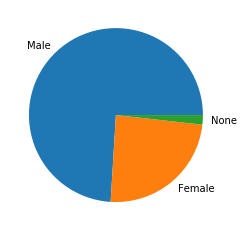

In [161]:
import matplotlib.pyplot as plt


genderData = [timesSpokenMale, timesSpokenFemale, timesSpokenNone]
print(genderData)
genderLabel = ['Male', 'Female', 'None']

plt.pie(genderData, labels=genderLabel)

if swiv == True:
    plt.savefig('timesSpokenGender_swiv.png')
else:
    plt.savefig('timesSpokenGender_swvii.png')

plt.show()

Summarize all the words of each male and female characters for the word cloud.

In [162]:
if swiv  == True:
    female_phrases = data[(data['name']=='LEIA') ]
    #female_phrases = female_words.phrase
    female_phrases.to_csv('female_phrases_swiv.txt', index=False, columns=['phrase'])
else:
    female_phrases = data[(data['name']=='REY') | (data['name']=='LEIA') ]
    #female_phrases = female_words.phrase
    female_phrases.to_csv('female_phrases_swvii.txt', index=False, columns=['phrase'])



In [163]:
if swiv  == True:
    male_phrases = data[(data['name']!='LEIA') | (data['name']!='THREEPIO')]
    #male_phrases = male_words.phrase
    male_phrases.to_csv('male_phrases_swiv.txt', index=False, columns=['phrase'])
else:
    male_phrases = data[(data['name']!='REY') | (data['name']!='LEIA') | (data['name']=='C-3PO') ]
    #male_phrases = male_words.phrase
    male_phrases.to_csv('male_phrases_swvii.txt', index=False, columns=['phrase'])